In [26]:
import networkx as nx
import json, os
import matplotlib.pyplot as plt

foldername = "latest"
path = f"data/relationships/{foldername}/json"

trues = [1139865460953026560,
        1139914664685580288,
        1139980218293215233,
        1140078466764853248,
        1139906468315095040,
        1139948716608167937,
        1140392133825835008,
        1139935778182717440,
        1140242652480376832,
        1139880274962059264,
        1139911776659787776,
        1139927656403746821,
        1139925597583532032,
        1139923398132424705,
        1140061456060297217,
        1140171260477018112,
        1140001077691133959,
        1139887625609895936,
        1140306312942800898,
        1140170052374859776,
        1139985715570384897,
        1140240721619955714]

falses = [1139893971461857280,
        1140304883242942465,
        1139836584998637569,
        1140199564273573889,
        1140037496367009792,
        1140351859464404992,
        1139885238912348161,
        1139969808680857601,
        1139977232590544897,
        1139971037620310016,
        1140035697019183105,
        1140210192631701504,
        1140089744799358978,
        1140553848743841798,
        1140550497486561280,
        1139876779001298946,
        1140486425286082560,
        1140410386753003520,
        1140223773804658688,
        1140385690695245824,
        1139849809634791424]

def generate_graphs(filenames):
    for filename in filenames:
        users = {}
        with open(os.path.join(path, str(filename)+".json"), 'r') as f:
            users = json.load(f)

        G = nx.DiGraph()

        origin = users[0]['screen_name']

        for user in users:
            if not G.has_node(user['screen_name']):
                G.add_node(user['screen_name'])
            for follower in user['followers']:
                if not G.has_node(follower):
                    G.add_node(follower)
                if not G.has_edge(follower, user['screen_name']):
                    G.add_edge(follower, user['screen_name'])

        G2 = G.reverse()
        graphs.append((origin, G2))
            
def generate_graph_similarities():
    for origin, graph in graphs:
        to_json_similarity = json.dumps((nx.simrank_similarity(graph, source=origin)), indent=4)
        similarities.append(to_json_similarity)

<Figure size 2160x2160 with 0 Axes>

22


Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.


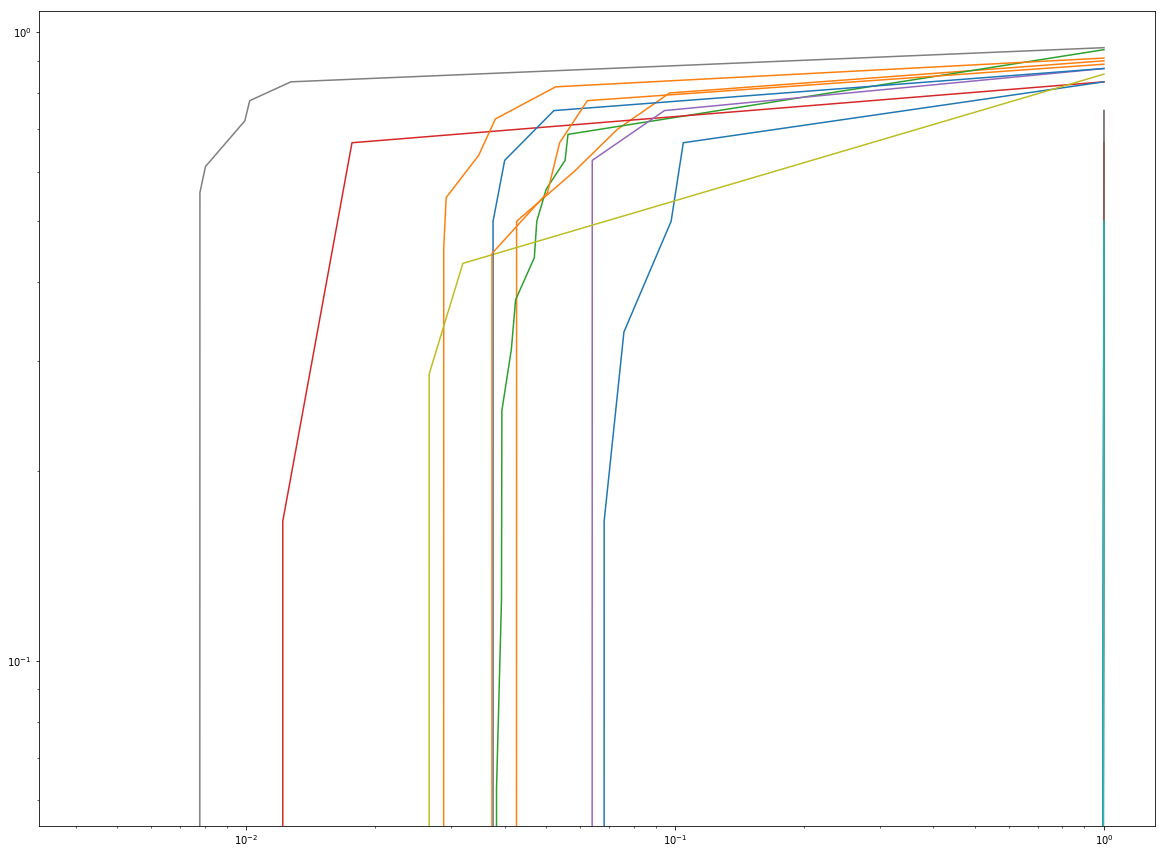

In [37]:
plt.figure(figsize=(20, 15))
graphs = []
similarities = []
print(len(trues))
generate_graphs(trues)
generate_graph_similarities()

import powerlaw
for similarity in similarities:
    a = [value for value in json.loads(similarity).values() if value > 0]
    results = powerlaw.Fit(a, verbose=False)
    results.plot_cdf()

21


Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Less than 2 unique data values left after xmin and xmax options! Canno

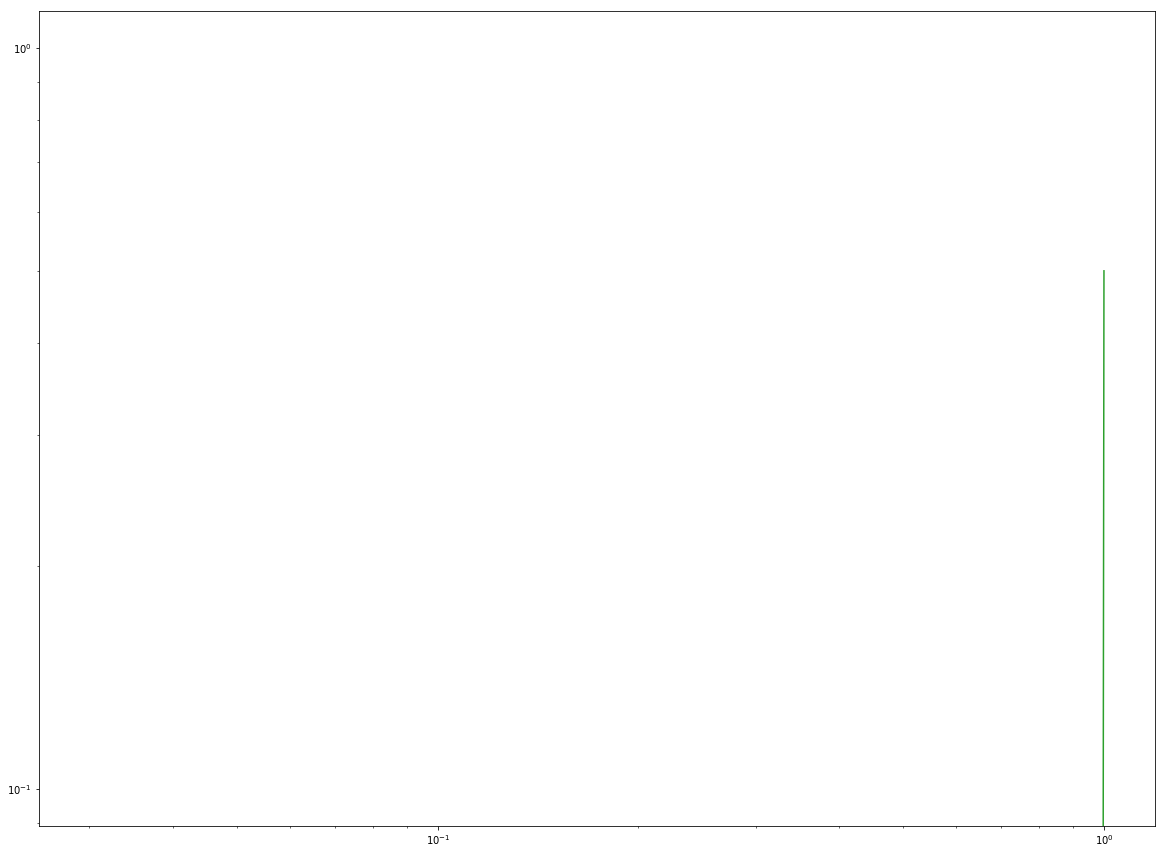

In [38]:
plt.figure(figsize=(20, 15))
graphs = []
similarities = []

print(len(falses))
generate_graphs(falses)
generate_graph_similarities()

import powerlaw
for similarity in similarities:
    a = [value for value in json.loads(similarity).values() if value > 0]
    results = powerlaw.Fit(a, verbose=False)
    results.plot_cdf()

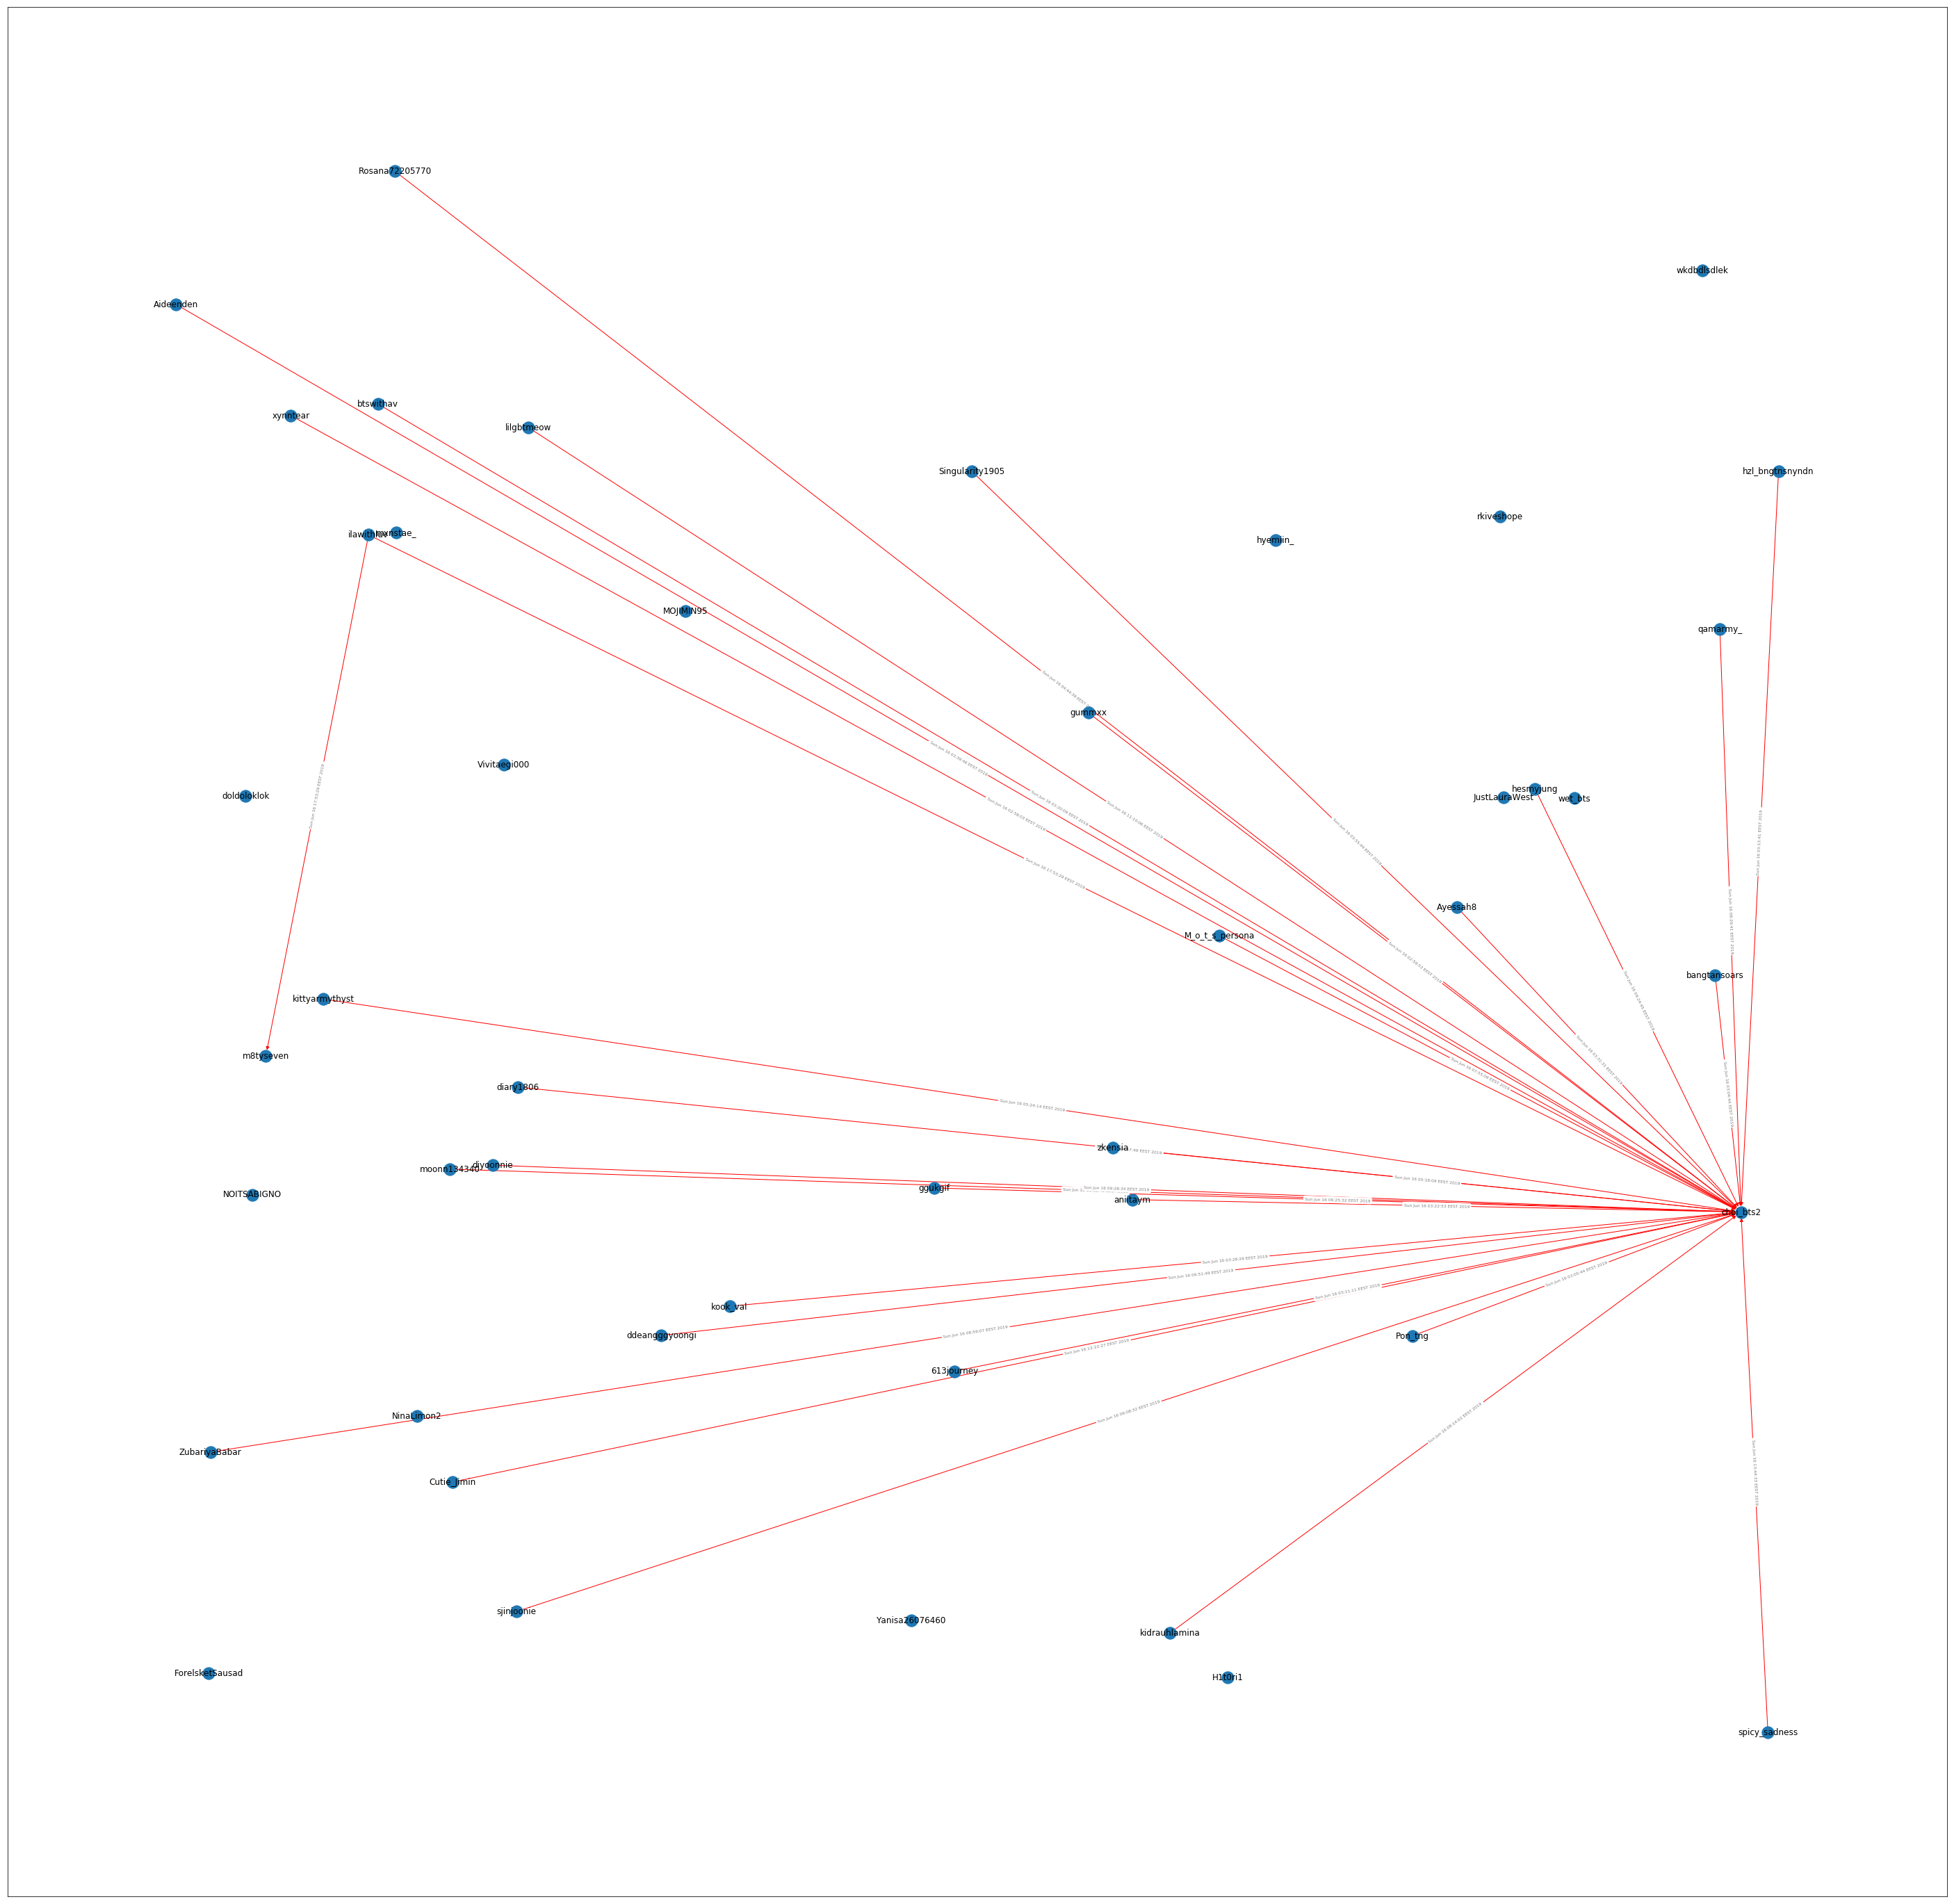

In [9]:
# Generates a Graph using the networkx library and plotting it with matplotlib
import networkx as nx
import json
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 50))

foldername = "latest"
filename = "1140089744799358978" # ENTER THE ID OF THE TWEET STORY
filepath = f"data/relationships/{foldername}/json/{filename}.json"

users = {}
with open(filepath, 'r') as f:
    users = json.load(f)
    
G = nx.DiGraph()

origin = users[0]['screen_name']

for user in users:
    if not G.has_node(user['screen_name']):
        G.add_node(user['screen_name'])
    for follower in user['followers']:
        if not G.has_node(follower):
            G.add_node(follower)
        if not G.has_edge(follower, user['screen_name']):
            G.add_edge(follower, user['screen_name'])
        
pos = nx.random_layout(G)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_nodes(G, pos, node_size = 300)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows=True)

edge_labels = dict([((u,v),user['tweet']) for u,v in G.edges 
                    for user in users if u == user['screen_name']])
nx.draw_networkx_edge_labels(G, pos, edge_labels, alpha=0.5, font_size=6)
            
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

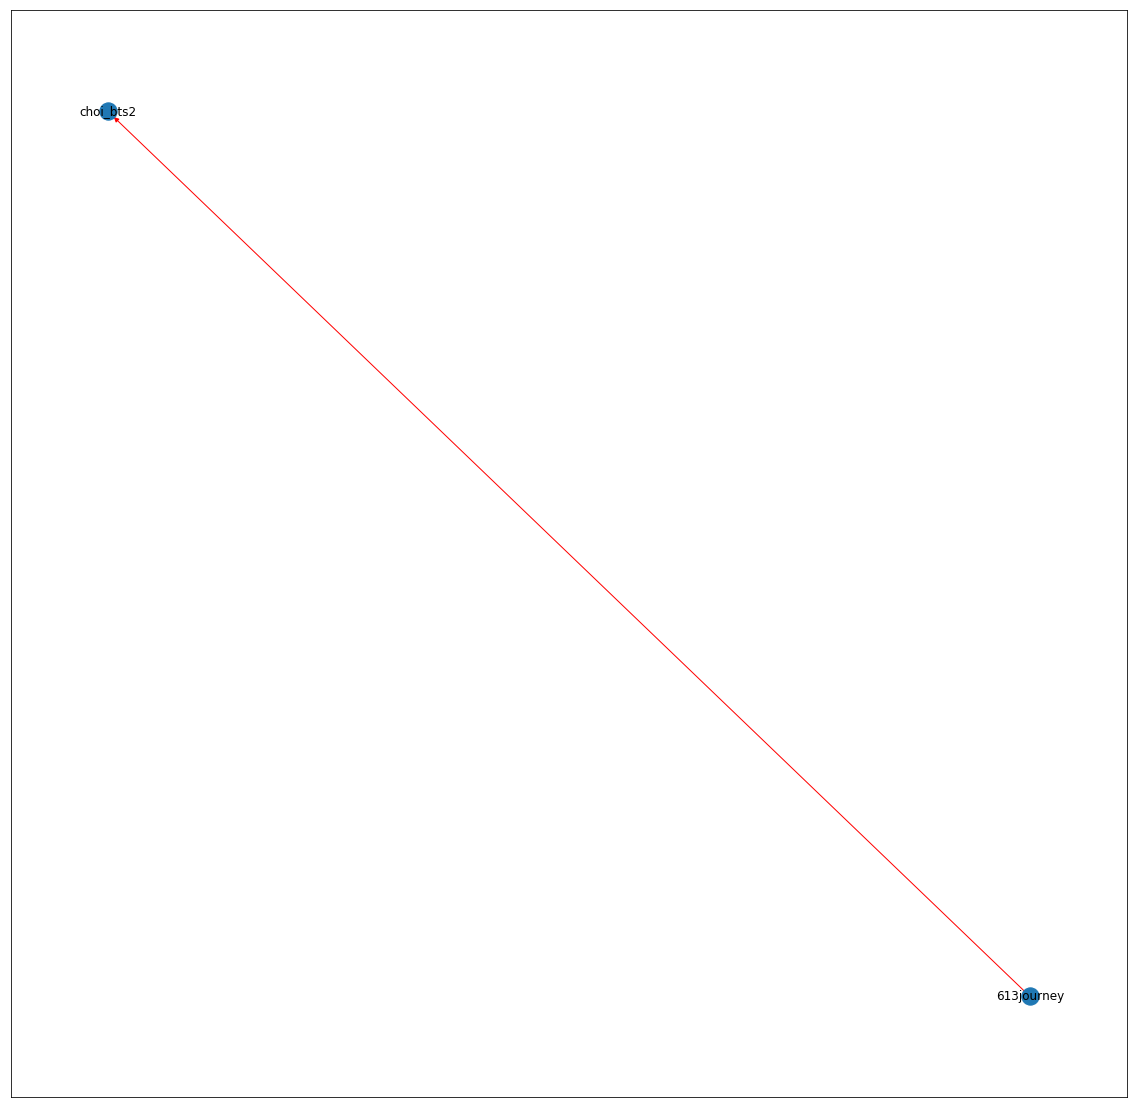

In [10]:
# Generating a subgraph, from a given node to the origin
plt.figure(figsize=(20, 20))

def subgraph_from_node(node):
    nodes = [node]
    
    queue = [neighbor for neighbor in G.neighbors(node)]
    while queue:
        next_one = queue.pop()
        if next_one not in nodes:
            nodes.append(next_one)
        queue.extend(neighbor for neighbor in G.neighbors(next_one))
    return nodes

# "PatriotMarie" is a manually picked node that has some interest
# for our subgraph creation
subgraph = G.subgraph(subgraph_from_node("613journey"))

pos2 = nx.random_layout(subgraph)
nx.draw_networkx_labels(subgraph, pos2)
nx.draw_networkx_nodes(subgraph, pos2, node_size = 300)
nx.draw_networkx_edges(subgraph, pos2, edge_color='r', arrows=True)

plt.show

In [10]:
# Creates a copy of the given graph, while reversing the edges' direction
# in order to compute the simrank similarity from the source-origin node

G2 = G.reverse()

In [11]:
# SimRank similarity of the subgraph nodes using
# the networkx algorithm
import json

to_json_similarity = json.dumps((nx.simrank_similarity(G2, source=origin)), indent=4)

print(to_json_similarity)

{
    "21WIRE": 1,
    "a_cujo": 0.0,
    "Albion_Rover": 0.04149306194376248,
    "Fletcher_N_S": 0.0,
    "The_Jag_10": 0.0,
    "X_RayVision": 0.0,
    "DJSiri": 0.015789473684210527,
    "raystapartam": 0.056241389500537045,
    "RickAfonso3": 0.0,
    "_2nd_Opinion": 0.0,
    "am_mirk": 0.0,
    "kungfu_mandarin": 0.04694493860767992,
    "MartianLobotomy": 0.0,
    "NPCBOBO": 0.026052631578947372,
    "RussiaConnects": 0.036121345103831026,
    "Alobhin": 0.02368421052631579,
    "lord_truman": 0.02533982142857143,
    "milesoftruth": 0.03832101296677371,
    "JakemanORipple": 0.056241389500537045,
    "xenkallas": 0.03936188909774436,
    "CathcartRoad": 0.0,
    "mikeefield": 0.0,
    "kim9973": 0.027868421052631584,
    "marvinlgranlund": 0.0,
    "KSmth2000": 0.0,
    "71johnny": 0.028039612849086997,
    "TonyCartalucci": 0.036331519152792716,
    "carla_venezia": 0.04757142857142857,
    "BriannaCeleGill": 0.039441431636848816,
    "PaulTheNurse1": 0.05538468880907625,
    

3000
10.0
124.47918583128745
10.0
10.0
10.0
47.36842105263158
168.72416850161113
10.0
10.0
10.0
140.83481582303975
10.0
78.15789473684212
108.36403531149308
71.05263157894737
76.01946428571429
114.96303890032114
168.72416850161113
118.08566729323307
10.0
10.0
83.60526315789475
10.0
10.0
84.11883854726099
108.99455745837815
142.71428571428572
118.32429491054644
166.15406642722874
118.08566729323307
150.13126671589686
168.72416850161113
10.0
10.0
10.0
10.0
35.526315789473685
10.0
168.72416850161113
10.0
10.0
71.05263157894737
127.36539413265305
10.0
10.0
10.0
10.0


Calculating best minimal value for power law fit
/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


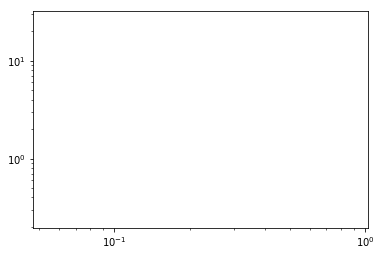

In [19]:
# Calculates the new size of each node in the graph
# based on the vectors produced by the simrank algorithm
nodes_size = [node * 3000 if node != 0.0 else 10.0 for node in json.loads(to_json_similarity).values()]
for node in nodes_size:
    print(node)
    
import powerlaw
a = [value * 1 if value > 0.0 else 0.01 for value in json.loads(to_json_similarity).values()]
results = powerlaw.Fit(a)
results.plot_pdf()

<function matplotlib.pyplot.show(*args, **kw)>

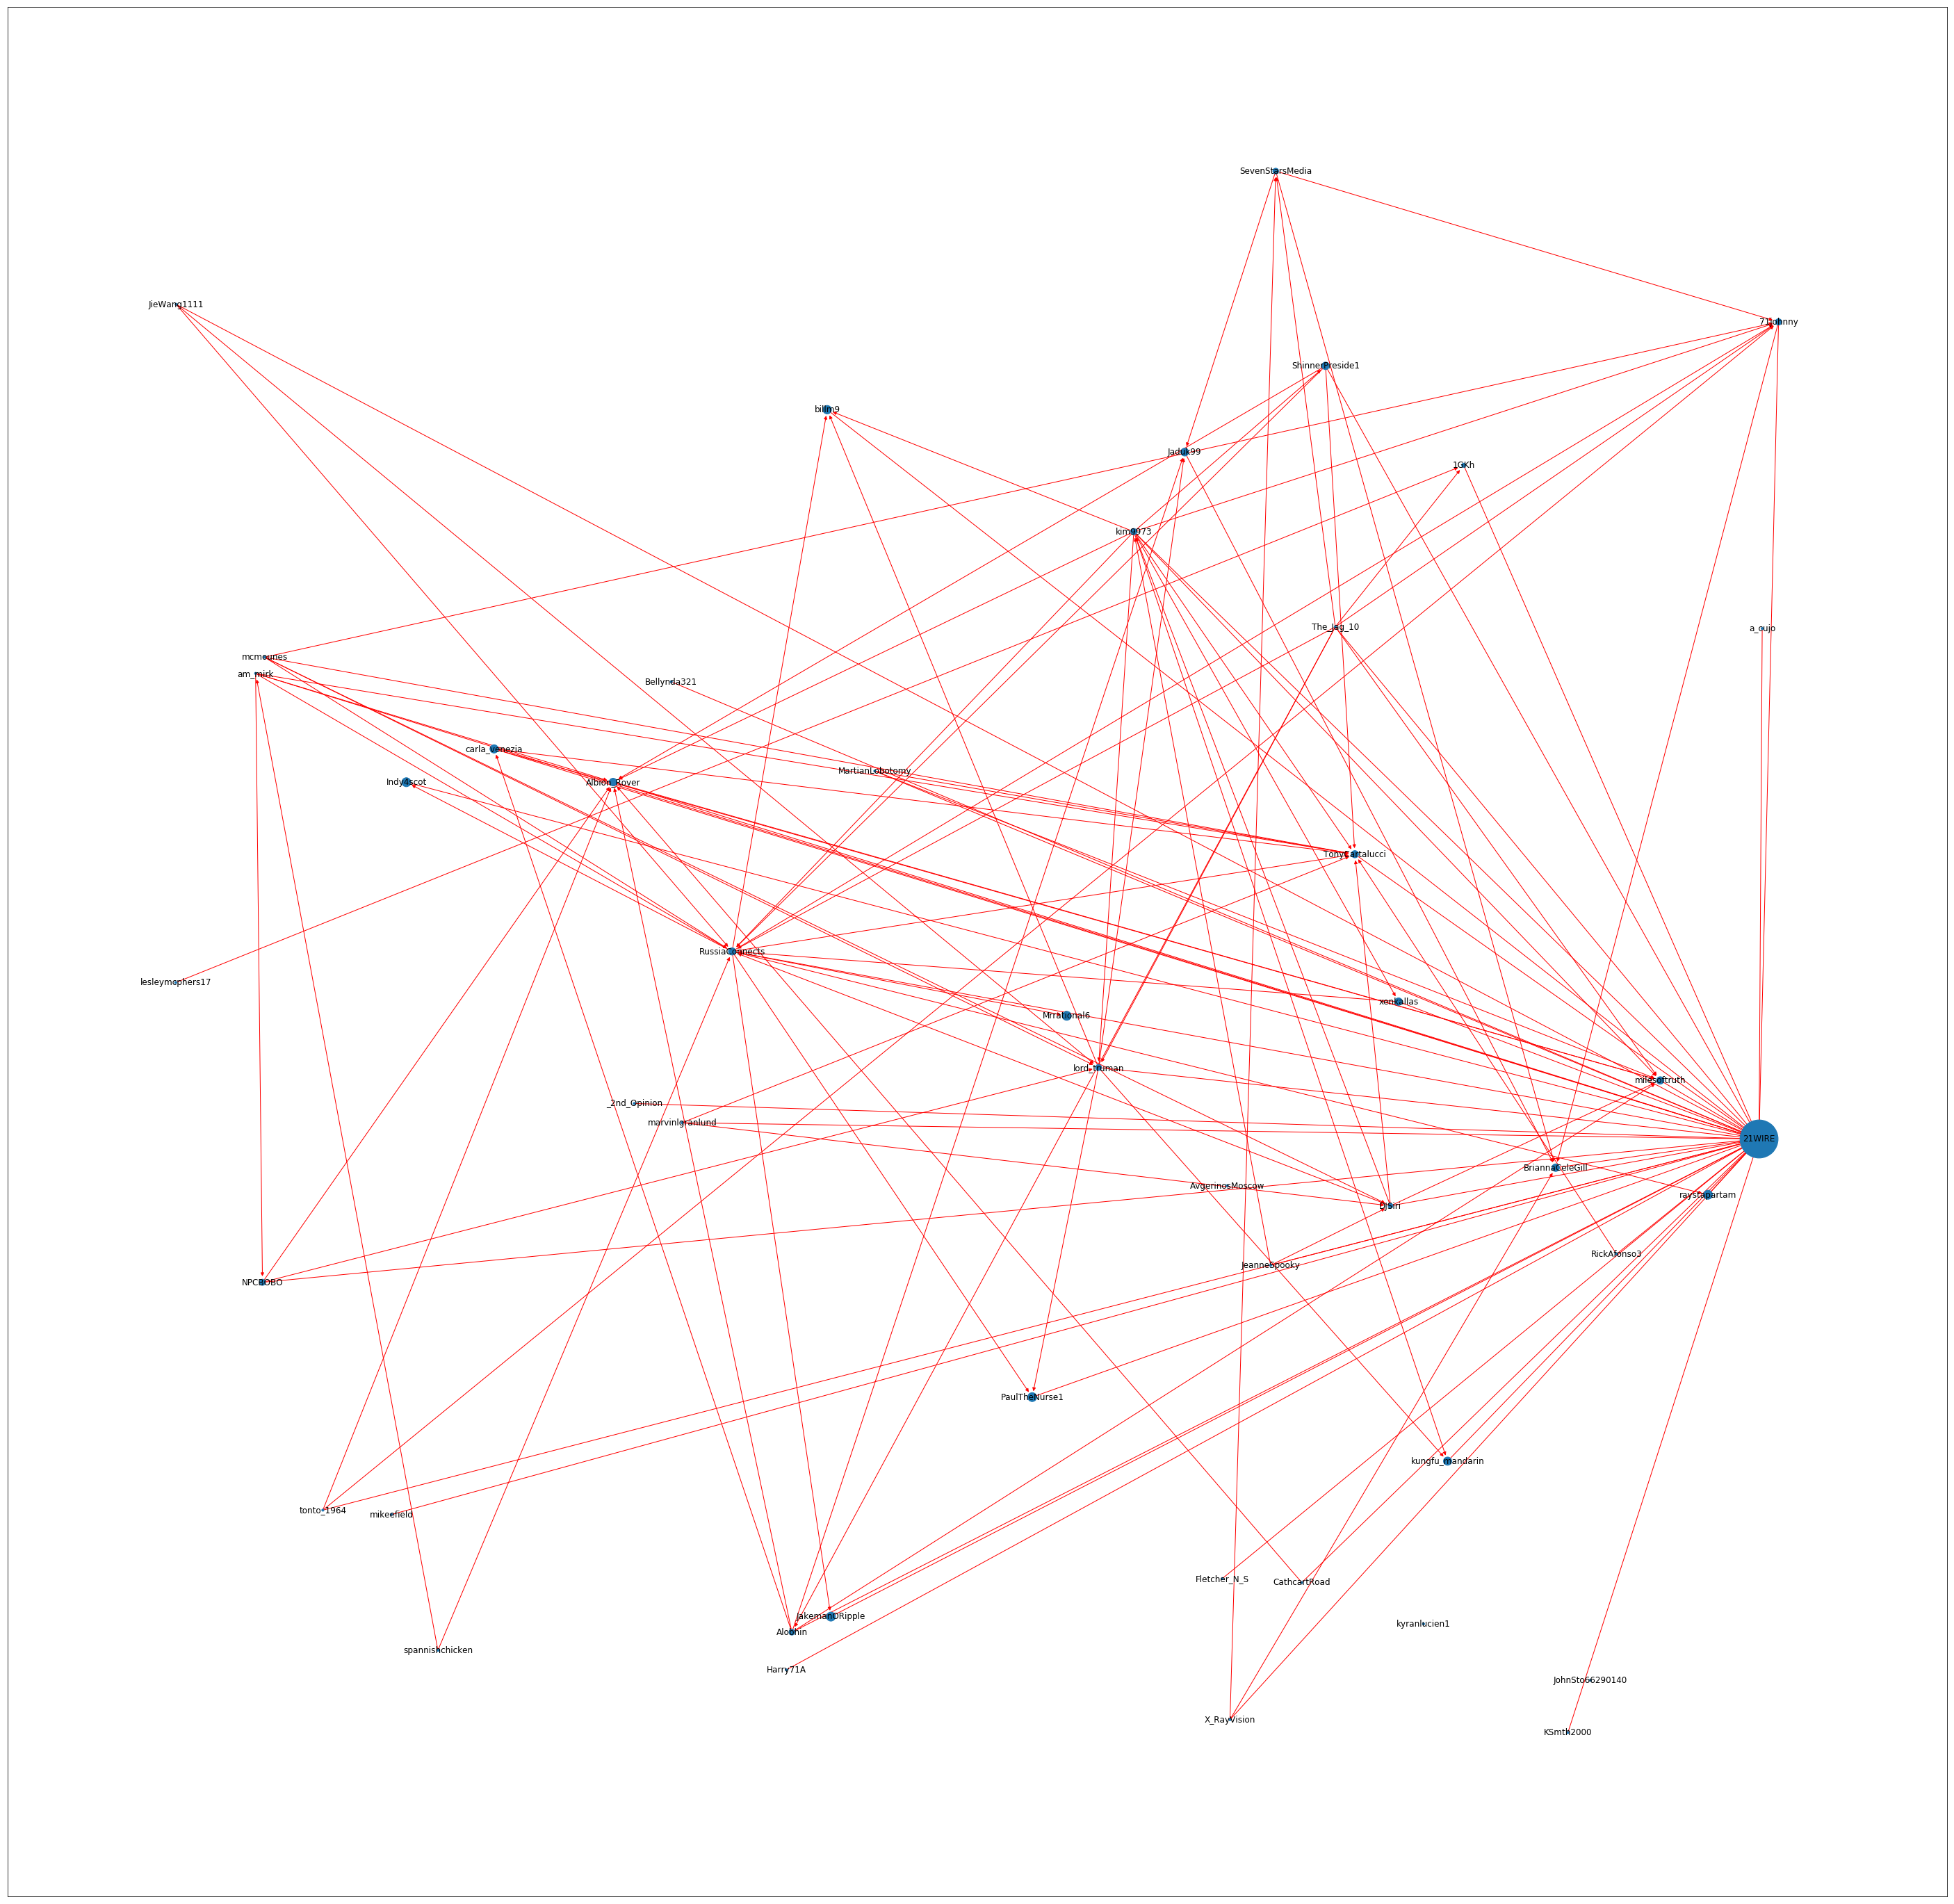

In [20]:
# Plotting the graph with the new node sizes
plt.figure(figsize=(50, 50))

pos3 = nx.random_layout(G)
nx.draw_networkx_labels(G, pos3)
nx.draw_networkx_nodes(G, pos3, node_size = nodes_size)
nx.draw_networkx_edges(G, pos3, edge_color='r', arrows=True)

plt.show

In [29]:
# Generating file with the dataset results
inputfile = "data/results2.csv"
outputfile = "data/relationships/latest/results.csv"

ids = []
with open(inputfile, 'r') as f:
    next(f)
    lines = f.readlines()
    ids = [line.split(",")[0] for line in lines]

simranks = {}
for id in ids:
    users = {}
    filepath = f"data/relationships/latest/json/{id}.json"
    with open(filepath, 'r') as f:
        users = json.load(f)
    
    G = nx.DiGraph()

    origin = users[0]['screen_name']

    for user in users:
        if not G.has_node(user['screen_name']):
            G.add_node(user['screen_name'])
        for follower in user['followers']:
            if not G.has_node(follower):
                G.add_node(follower)
            if not G.has_edge(follower, user['screen_name']):
                G.add_edge(follower, user['screen_name'])
    G2 = G.reverse()
    simrank = nx.simrank_similarity(G2, source=origin)
    simranks[id] = simrank
    
with open(outputfile, 'w') as outputf:
    with open(inputfile, 'r') as inputf:
        header = inputf.readline().replace("\n", "")
        outputf.write(header + ",simrank\n")
        for line in inputf.readlines():
            id = line.split(",")[0]
            outputf.write(line.replace("\n", "") + "," + json.dumps(simranks[id]) + "\n")
        